In [48]:
import torch
import pickle
import numpy as np
from glob import glob
from tqdm import tqdm
from datasets import load_dataset
from sklearn.preprocessing import MinMaxScaler

In [49]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Visualize Fisher Scores for Each Model (WRT Model)

In [50]:
with open('./Fisher/BERT/fisher_bert.pkl','rb') as fp:
    bert = pickle.load(fp)
with open('./Fisher/GPT2/fisher_gpt2.pkl','rb') as fp:
    gpt2 = pickle.load(fp)
with open('./Fisher/T5/fisher_t5.pkl','rb') as fp:
    t5 = pickle.load(fp)

In [51]:
bert_params = []
for x in bert:
    bert_params.extend(x.numpy().ravel().tolist())
gpt2_params = []
for x in gpt2:
    gpt2_params.extend(x.numpy().ravel().tolist())
t5_params = []
for x in t5:
    t5_params.extend(x.numpy().ravel().tolist())

In [52]:
scaler_b = MinMaxScaler()
scaler_g = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_b.fit(np.asarray(bert_params).reshape(-1,1))
scaler_g.fit(np.asarray(gpt2_params).reshape(-1,1))
scaler_t.fit(np.asarray(t5_params).reshape(-1,1))

scaled_b = scaler_b.transform(np.asarray(bert_params).reshape(-1,1)).flatten()
scaled_g = scaler_g.transform(np.asarray(gpt2_params).reshape(-1,1)).flatten()
scaled_t = scaler_t.transform(np.asarray(t5_params).reshape(-1,1)).flatten()

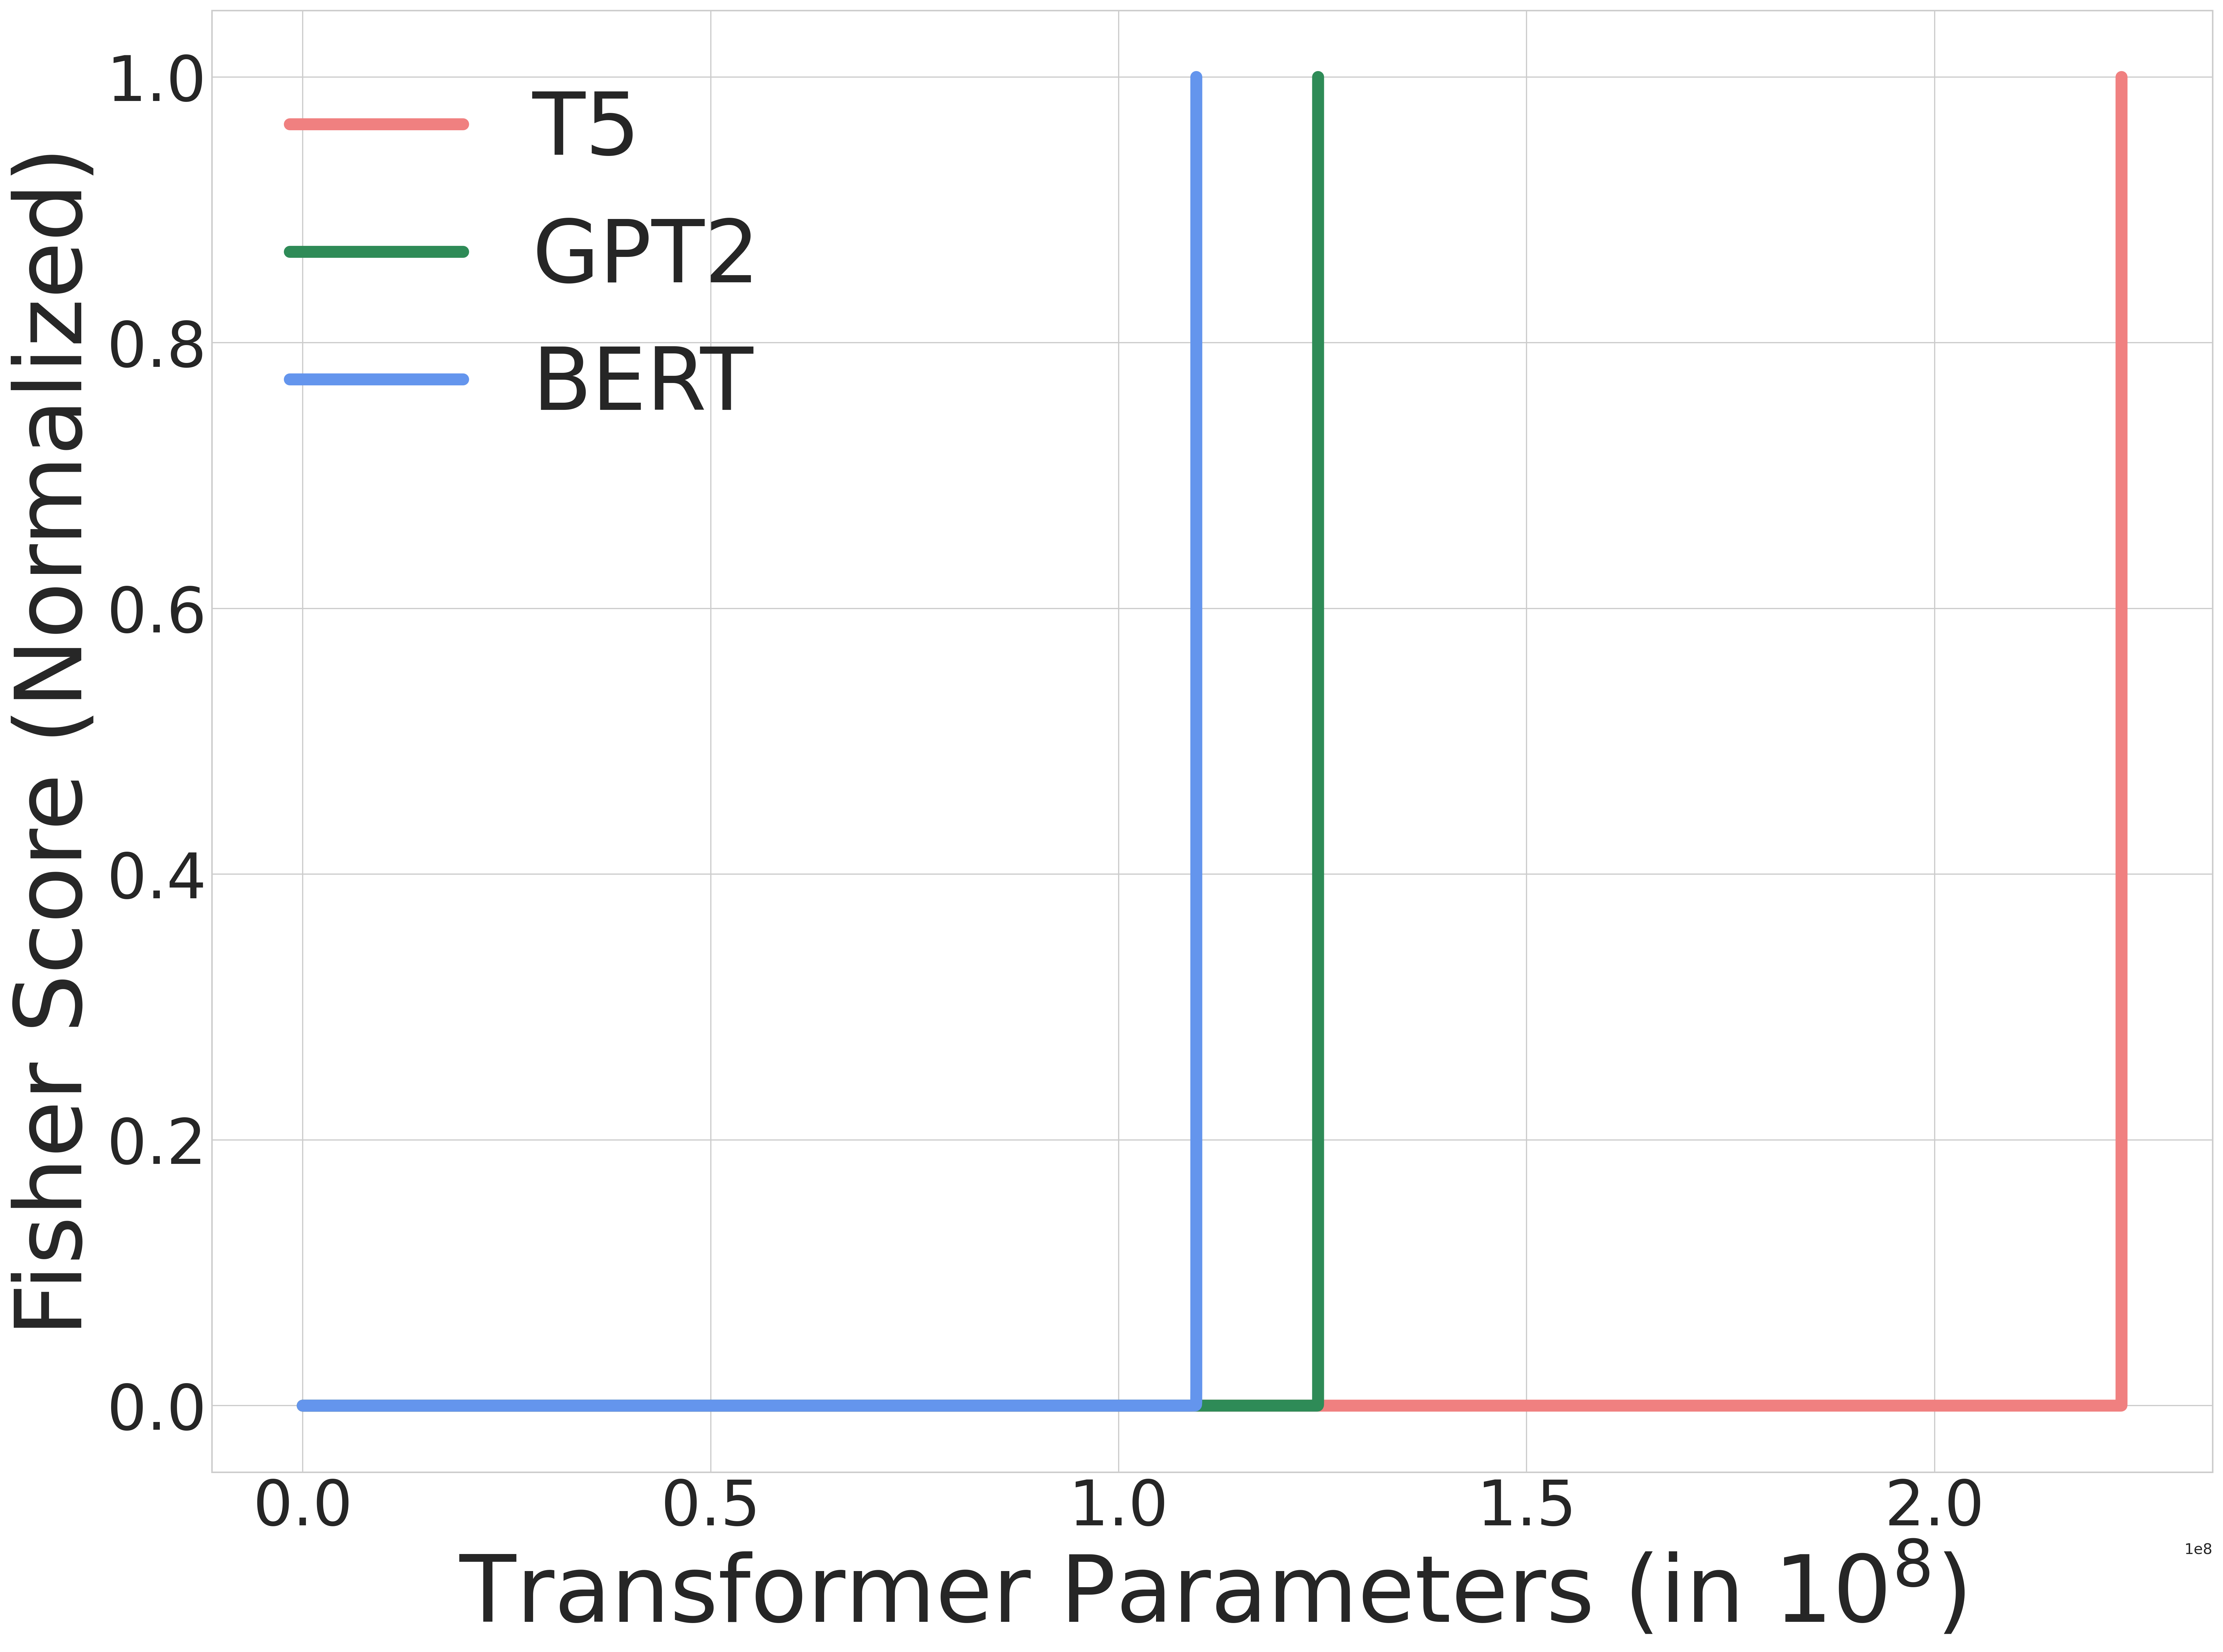

In [54]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 18), dpi=360)    
plt.plot(sorted(scaled_t), linewidth=8, color = 'lightcoral', label = 'T5')
plt.plot(sorted(scaled_g), linewidth=8, color = 'seagreen', label = 'GPT2')
plt.plot(sorted(scaled_b), linewidth=8, color = 'cornflowerblue', label = 'BERT')
plt.xticks(fontsize= 42)
plt.yticks(fontsize= 42)
plt.xlabel('Transformer Parameters (in $10^8$)', fontsize= 62)
plt.ylabel('Fisher Score (Normalized)', fontsize= 62)
plt.legend(prop={'size': 58}, loc = 'upper left', ncol=1 ,facecolor='floralwhite')
plt.show()

In [20]:
aggs_b = []
for i in range(len(bert)):
    aggs_b.append(np.mean(bert[i].ravel().numpy()))
    
aggs_g = []
for i in range(len(gpt2)):
    aggs_g.append(np.mean(gpt2[i].ravel().numpy()))

aggs_t = []
for i in range(len(t5)):
    aggs_t.append(np.mean(t5[i].ravel().numpy()))

In [43]:
scaler_b = MinMaxScaler()
scaler_g = MinMaxScaler()
scaler_t = MinMaxScaler()

In [44]:
scaler_b.fit(np.asarray(sorted(aggs_b)[:-1]).reshape(-1,1))
scaler_g.fit(np.asarray(aggs_g).reshape(-1,1))
scaler_t.fit(np.asarray(aggs_t).reshape(-1,1))

MinMaxScaler()

In [45]:
scaled_b = scaler_b.transform(np.asarray(sorted(aggs_b)[:-1]).reshape(-1,1)).flatten()
scaled_g = scaler_g.transform(np.asarray(aggs_g).reshape(-1,1)).flatten()
scaled_t = scaler_t.transform(np.asarray(aggs_t).reshape(-1,1)).flatten()

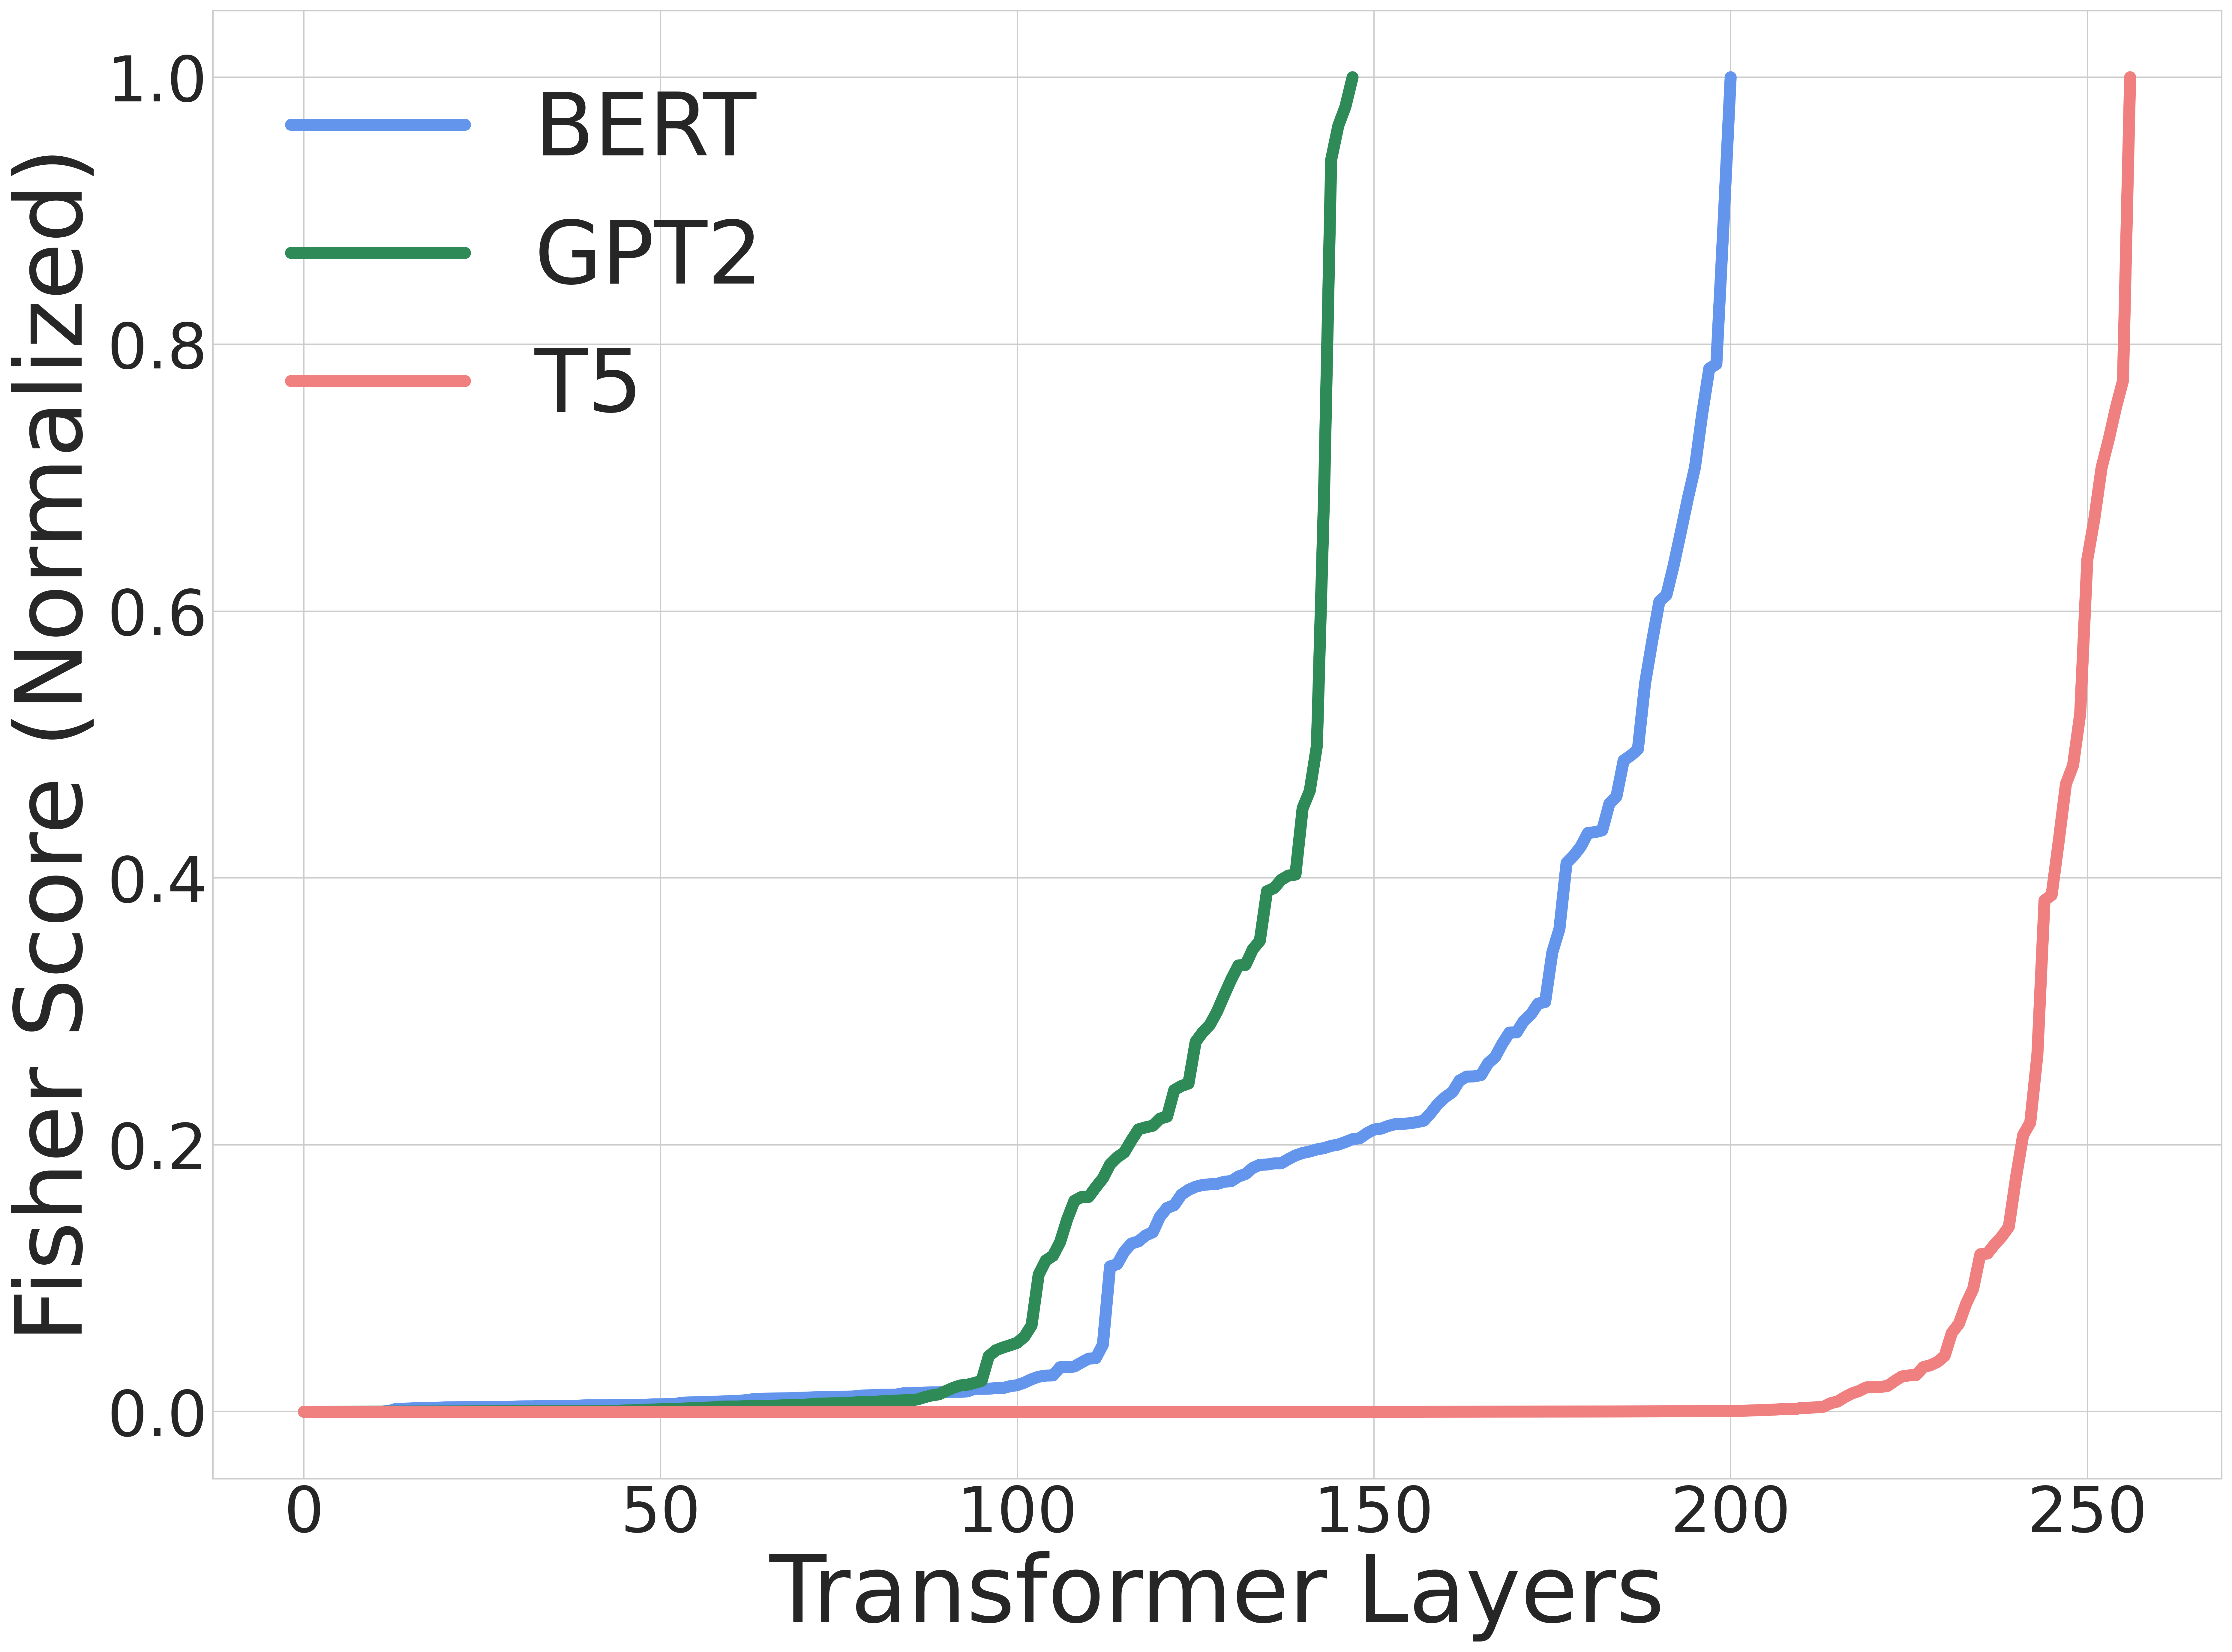

In [47]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 18), dpi=360)    
plt.plot(sorted(scaled_b), linewidth=8, color = 'cornflowerblue', label = 'BERT')
plt.plot(sorted(scaled_g), linewidth=8, color = 'seagreen', label = 'GPT2')
plt.plot(sorted(scaled_t), linewidth=8, color = 'lightcoral', label = 'T5')
plt.xticks(fontsize= 42)
plt.yticks(fontsize= 42)
plt.xlabel('Transformer Layers', fontsize= 62)
plt.ylabel('Fisher Score (Normalized)', fontsize= 62)
plt.legend(prop={'size': 58}, loc = 'upper left', ncol=1 ,facecolor='floralwhite')
plt.show()